folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 0


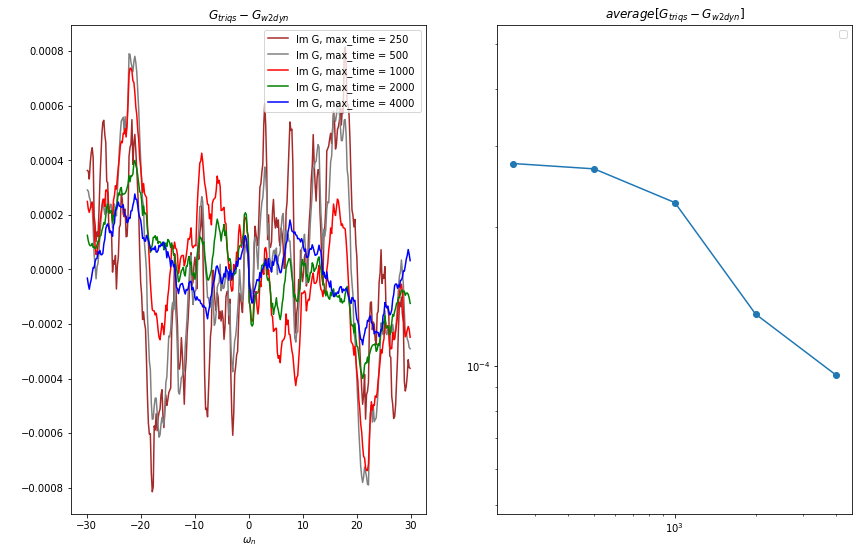

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 1


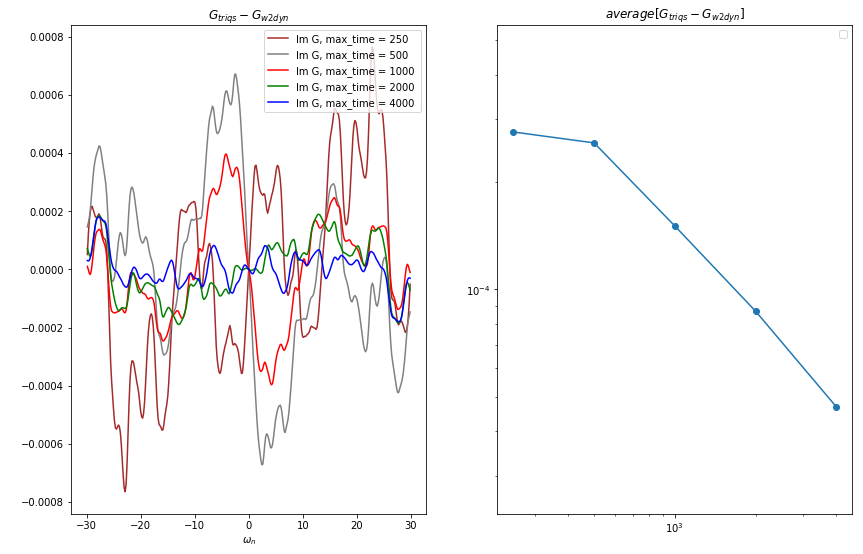

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 2, orb_2 = 2


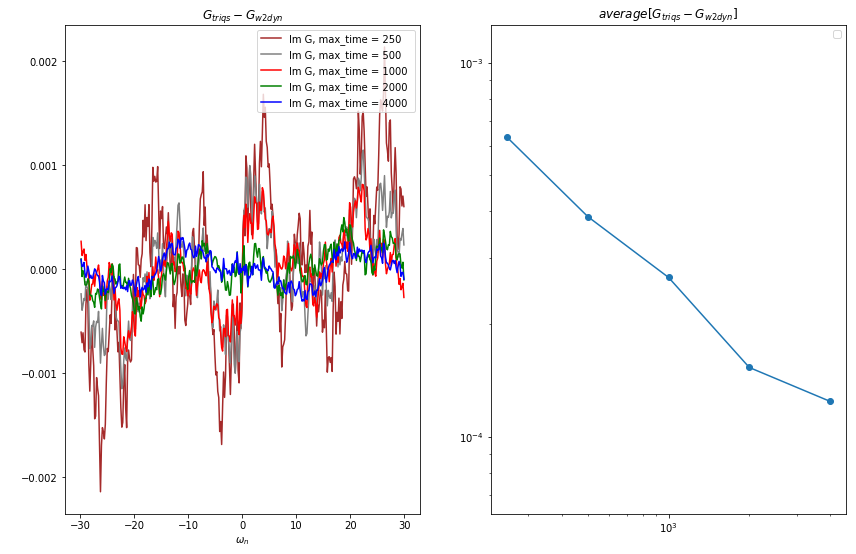

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 0


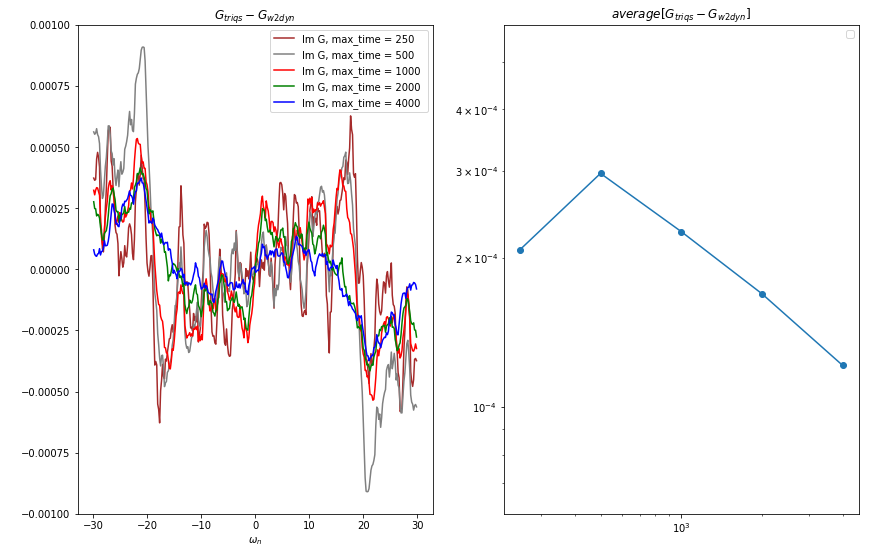

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 1


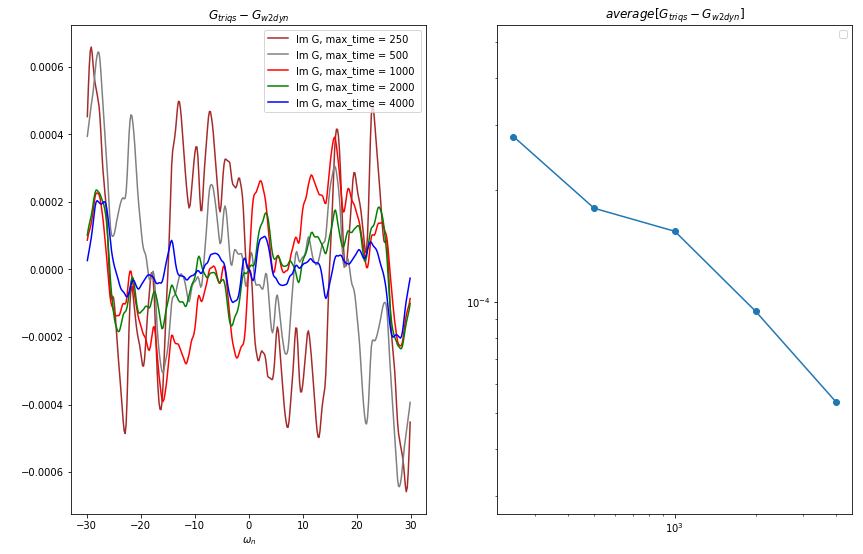

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 2, orb_2 = 2


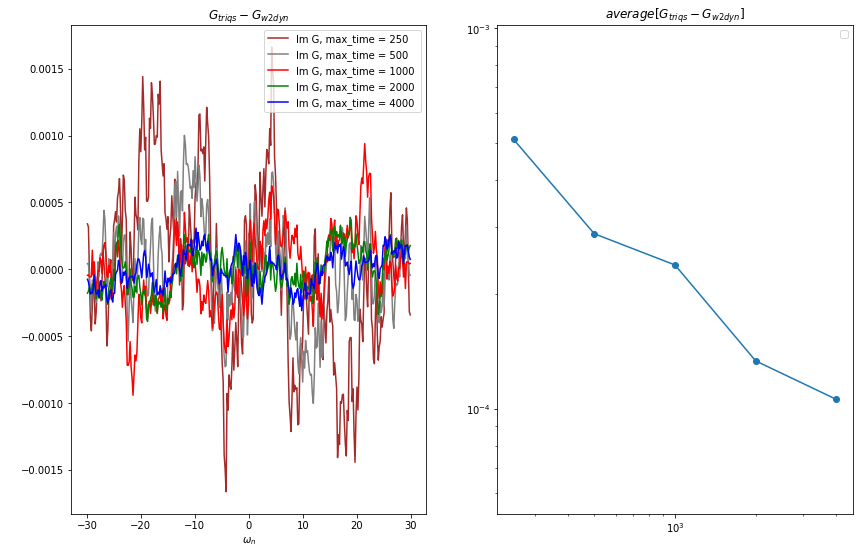

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 0, orb_2 = 0


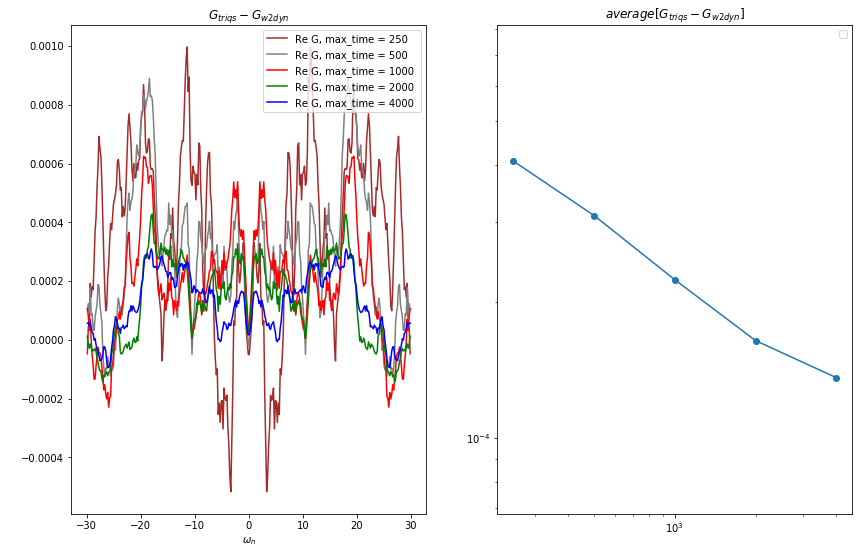

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 1, orb_2 = 1


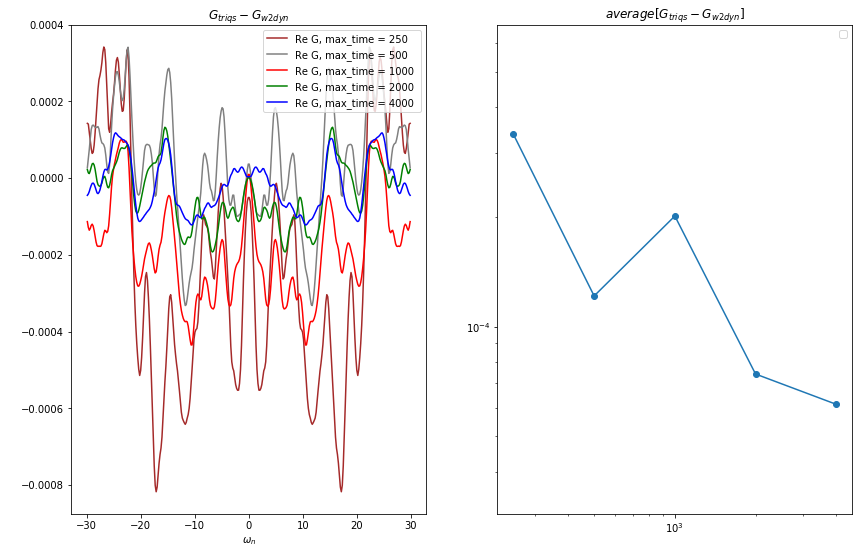

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = dn, orb_1 = 2, orb_2 = 2


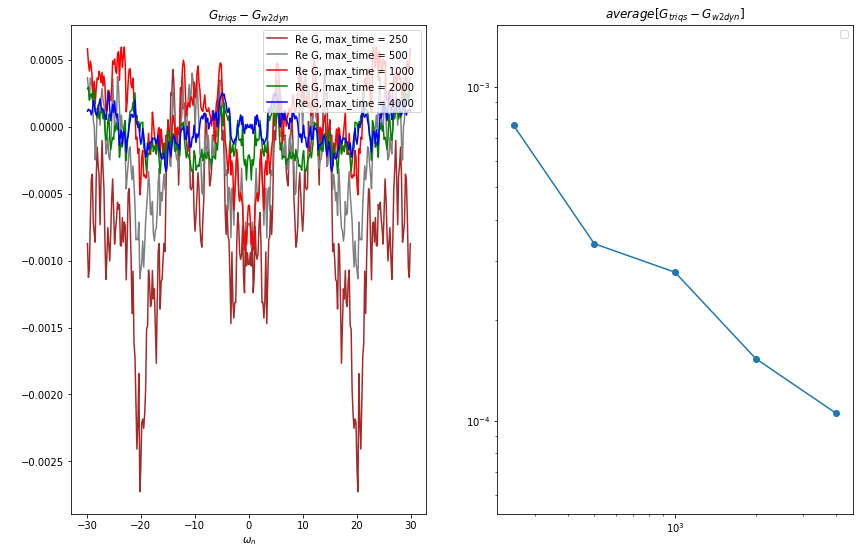

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 0, orb_2 = 0


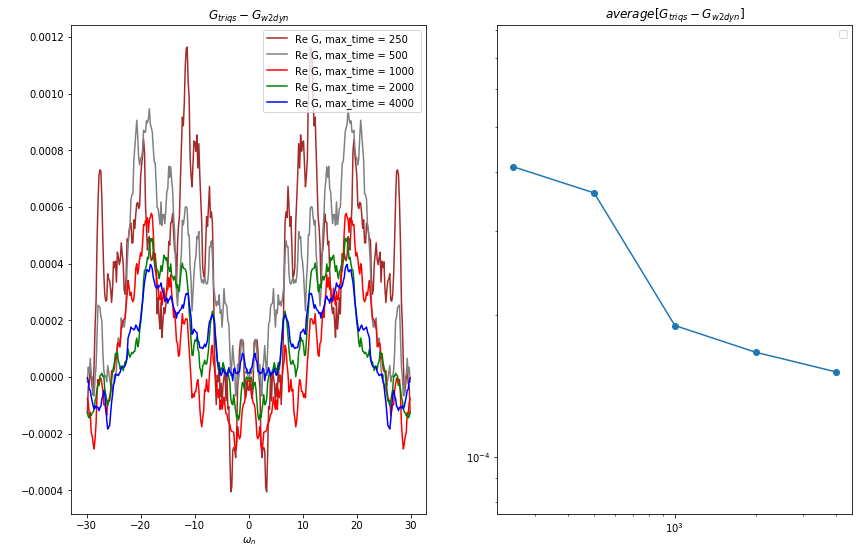

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 1, orb_2 = 1


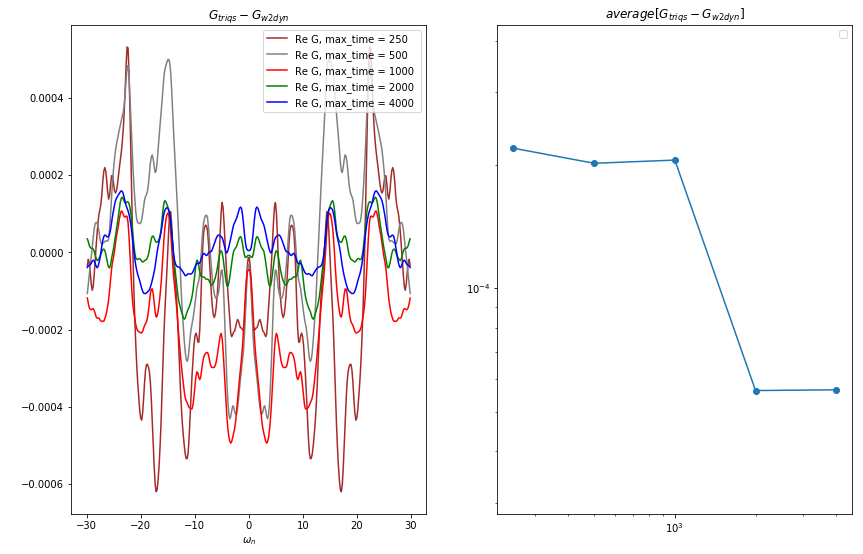

folder results_250/
folder results_500/
folder results_1000/
folder results_2000/
folder results_4000/
spin = up, orb_1 = 2, orb_2 = 2


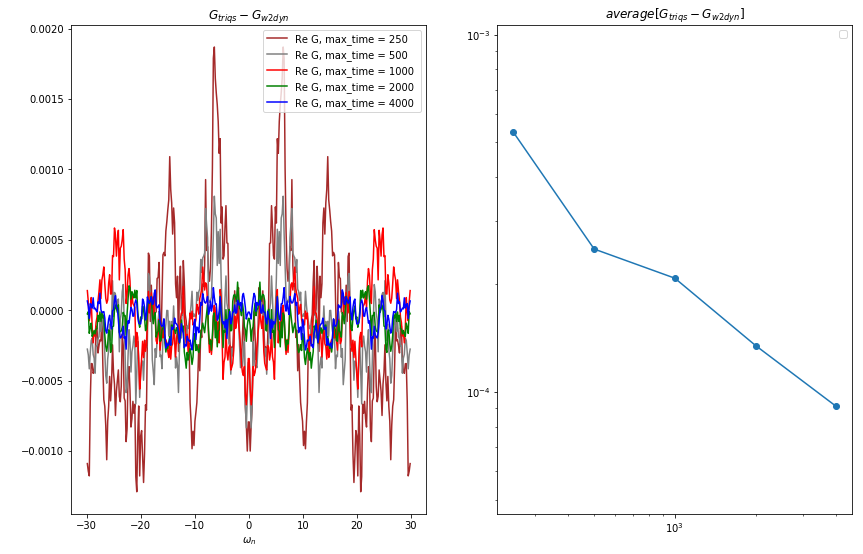

In [3]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oploti, oplotr, plt
import numpy as np
plt.rcParams["figure.figsize"] = (14,9)
#plt.rcParams["figure.figsize"] = (10,6)

color=['brown', 'grey', 'red', 'green', 'blue', 'black']
#titlecolor=['grey', 'red', 'green', 'black']

plt.rcParams.update({'font.size': 10})

for m in {"I", "R"}:
    for s in {"up", "dn"}:
        for b1 in range(0,3):

            data = []

            variances = []
            differences = []

            times = [250, 500, 1000, 2000, 4000]
            #times = [250, 500, 1000]
            #times = [250]

            for nt, max_time in enumerate(times):

                folder = "results_"+str(max_time)+"/"
                print 'folder', folder

                w2dyn = HDFArchive(folder+'w2dyn_cthyb___onlygiw.h5','r')
                triqs = HDFArchive(folder+'cthyb___onlygiw.h5','r')

                iw_max = 30

                ind_min = 182
                ind_max = 517

                def real_or_imag(array):

                    if m == "R":
                        return np.real(array)
                    else:
                        return np.imag(array)

                ### calculate variance and differences
                v = np.var(real_or_imag(w2dyn['G'][s][b1,b1].data[ind_min:ind_max]-triqs['G'][s][b1,b1].data[ind_min:ind_max]))
                d = np.average(np.abs(real_or_imag(w2dyn['G'][s][b1,b1].data[ind_min:ind_max]-triqs['G'][s][b1,b1].data[ind_min:ind_max])))

                variances = np.append(variances, v)
                differences = np.append(differences, d)

                ### plot plot plot the stuff
                label = "G, max_time = " + str(max_time)
                plt.subplot(1, 2, 1)
                plt.title("$G_{triqs}-G_{w2dyn}$")
                oplot(triqs['G'][s][b1,b1]-w2dyn['G'][s][b1,b1], '-', x_window = (-iw_max,iw_max), mode = m, name = label , color = color[nt])
                plt.ylabel(" ")

            print "spin = " + str(s) + ", orb_1 = " + str(b1) + ", orb_2 = " + str(b1)

            def get_log_boundaries(arr1, arr2):

                maxval = max(np.amax(arr1), np.amax(arr2))
                minval = min(np.amin(arr1), np.amin(arr2))

                expon = np.floor(np.log10(np.abs(maxval))).astype(int)
                upperbound = 10.0**(expon+1)

                expon = np.floor(np.log10(np.abs(minval))).astype(int)
                lowerbound = 10.0**(expon)

                #return (lowerbound, upperbound)
                return (minval/2, maxval*2)

            ax3 = plt.subplot(1, 2, 2)
            plt.loglog(times, differences, "o-", label = None)

            plt.ylim(get_log_boundaries(differences, differences))

            plt.title("$average[G_{triqs}-G_{w2dyn}]$")
            plt.ylabel(" ")

            plt.legend(loc = 'best')

            plt.show()